# HR Analytics Project

Description

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees. How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r'C:\Users\alvin\Downloads\ibm-hr-analytics-employee-attrition-performance.zip')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


#### Exploratory Data Analysis


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

From above we can see that many of the columns has low unique values and hence can be termed as classified columns. Our target variable 'Attrition" has only two values so we can say this is a case of classification problem. We can also drop those columns which have only one unique value as they are same for every row so dropping them wont make a difference to the prediction. Also EmployeeNumber column provides just a serial number for each employee so that also wont be necessary for our model building.

In [7]:
df.drop(columns=['EmployeeCount','Over18','StandardHours','EmployeeNumber'],inplace=True)

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Visualisation

In [14]:
cols=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']

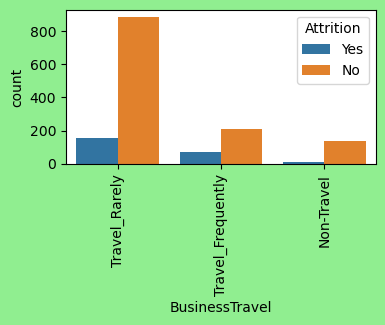

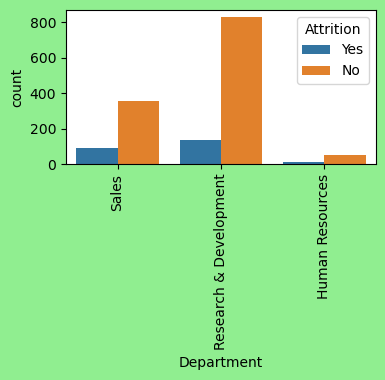

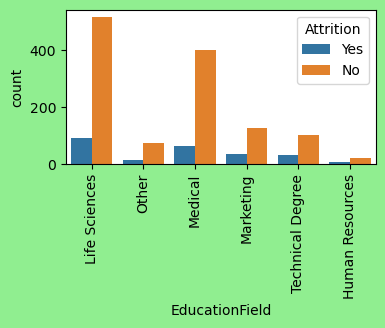

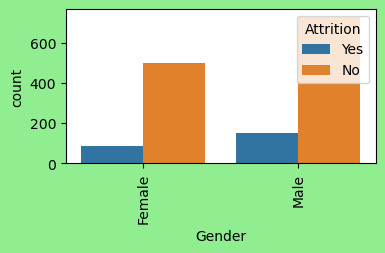

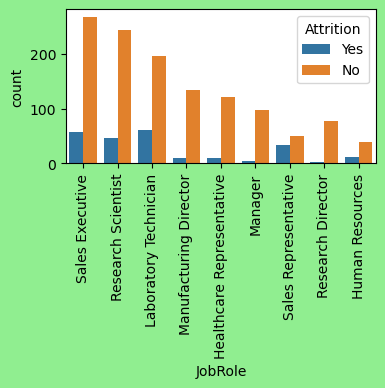

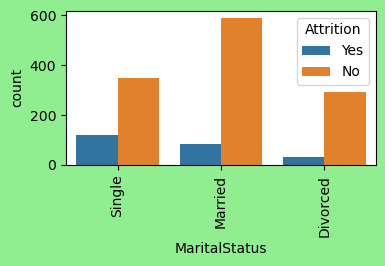

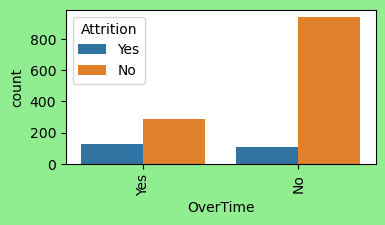

In [18]:
for i in cols:
    plt.figure(figsize=(4,2),facecolor='lightgreen')
    plt.xticks(rotation=90)
    sns.countplot(x=i,data=df,hue='Attrition')
    plt.show(),

In [19]:
rating_cols=['EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','RelationshipSatisfaction','PerformanceRating','JobInvolvement']

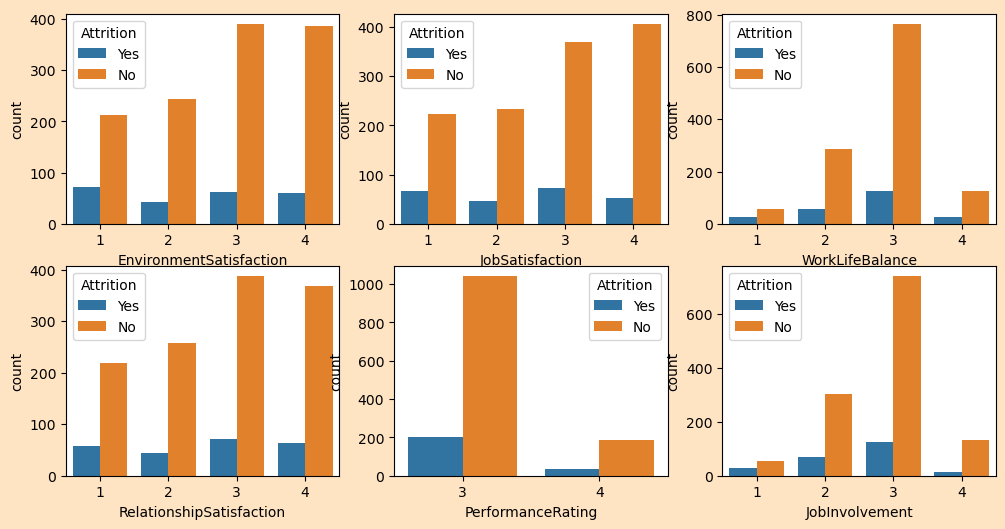

In [38]:
plt.figure(facecolor='bisque',figsize=(12,6))
p=1
for i in rating_cols:
    if p<=8:
        ax=plt.subplot(2,3,p)
        sns.countplot(x=i,data=df,hue='Attrition')
    p+=1

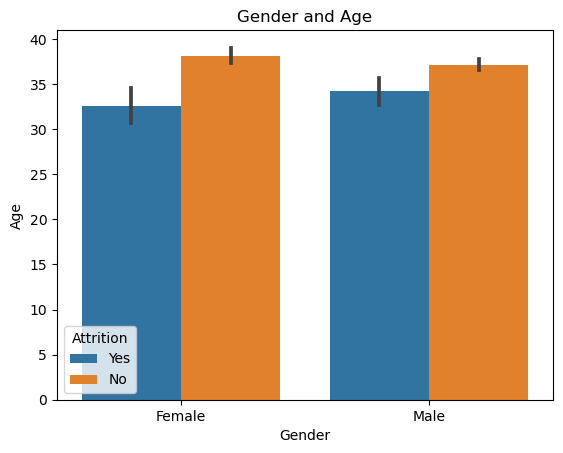

<Figure size 700x800 with 0 Axes>

In [39]:
plt.title('Gender and Age')
sns.barplot(x='Gender',y='Age',hue='Attrition',data=df)
plt.figure(figsize=(7,8))
plt.show()

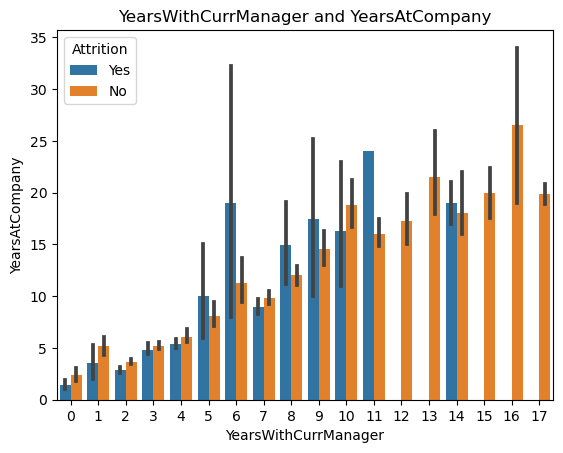

In [40]:
plt.title('YearsWithCurrManager and YearsAtCompany')
sns.barplot(x='YearsWithCurrManager',y='YearsAtCompany',hue='Attrition',data=df)
plt.show()

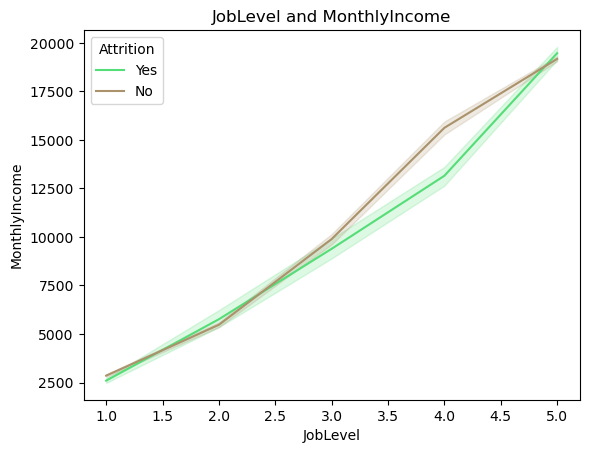

In [41]:
plt.title('JobLevel and MonthlyIncome')
sns.lineplot(x='JobLevel',y='MonthlyIncome',hue='Attrition',markers='D',data=df,palette="terrain")
plt.show()

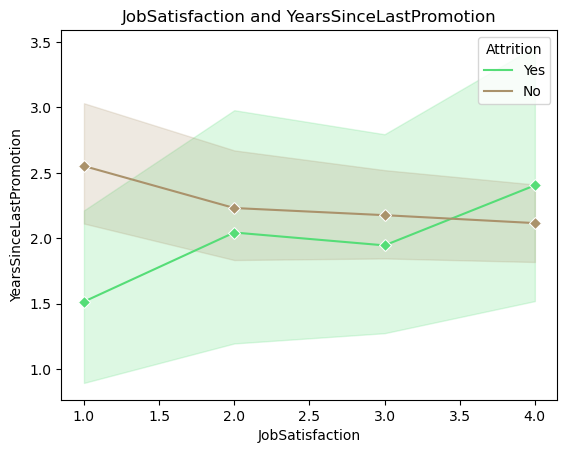

In [49]:
plt.title('JobSatisfaction and YearsSinceLastPromotion')
sns.lineplot(x='JobSatisfaction',y='YearsSinceLastPromotion',hue='Attrition',data=df,marker='D',palette="terrain")
plt.show()

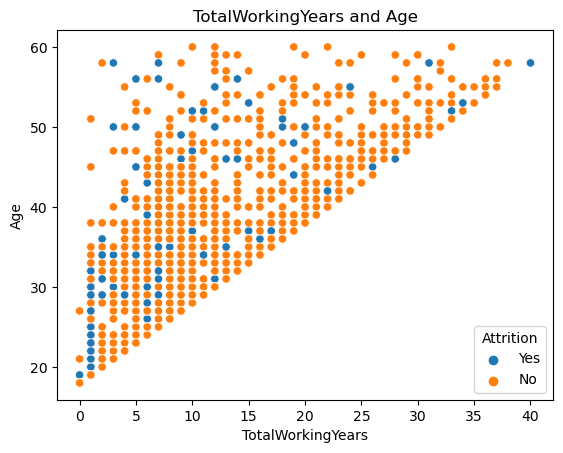

In [50]:
plt.title('TotalWorkingYears and Age')
sns.scatterplot(x='TotalWorkingYears',y='Age',hue='Attrition',data=df)
plt.show()

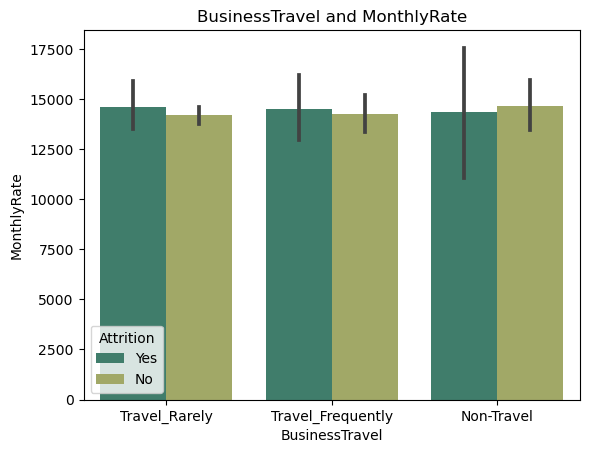

In [51]:
plt.title('BusinessTravel and MonthlyRate')
sns.barplot(x='BusinessTravel',y='MonthlyRate',hue='Attrition',data=df,palette="gist_earth")
plt.show()

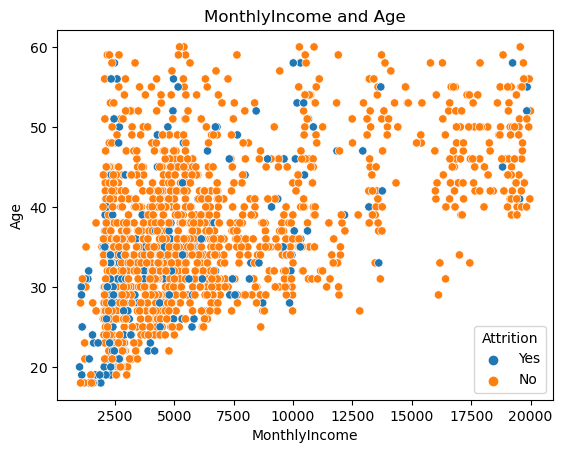

In [52]:
plt.title('MonthlyIncome and Age')
sns.scatterplot(x='MonthlyIncome',y='Age',hue='Attrition',data=df)
plt.show()

From above graphs we notice that-

1.Attrition increases with the increase in distance from home specially for women

2.Attrition is more when there is less job satisfaction but as the years since last promotion increases even then there is attrition regardless of job satisfaction

3.Total working hours increases with the job level and so does the attrition.

4.Attrition is less inversely related to years in company.
Most attrition is in the sales department of the company.

In [53]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df.replace({'Attrition':{'No':0,'Yes':1}},inplace=True)
df[ ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']]=oe.fit_transform(df[ ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']])
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1.0,884,1.0,23,2,3.0,3,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2.0,613,1.0,6,1,3.0,4,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2.0,155,1.0,4,3,1.0,2,1.0,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1.0,1023,2.0,2,3,3.0,4,1.0,...,3,4,0,17,3,2,9,6,0,8


In [54]:
df.corr()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


<Axes: >

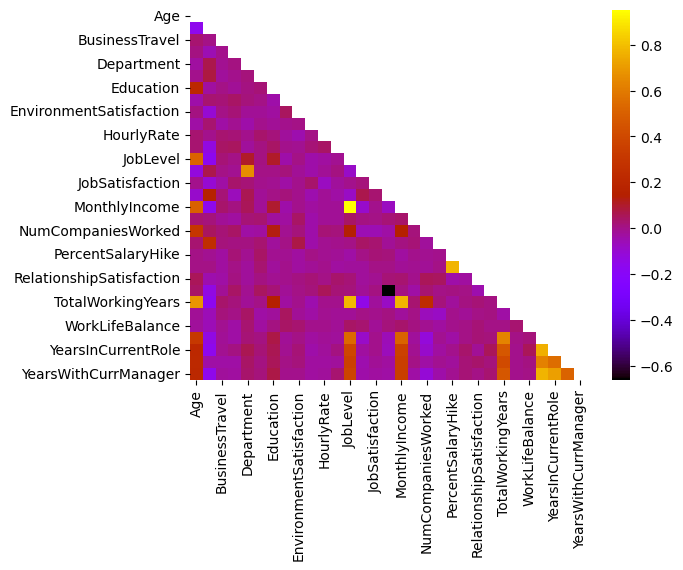

In [56]:
sns.heatmap(df.corr(),mask=np.triu(df.corr()),cmap='gnuplot')

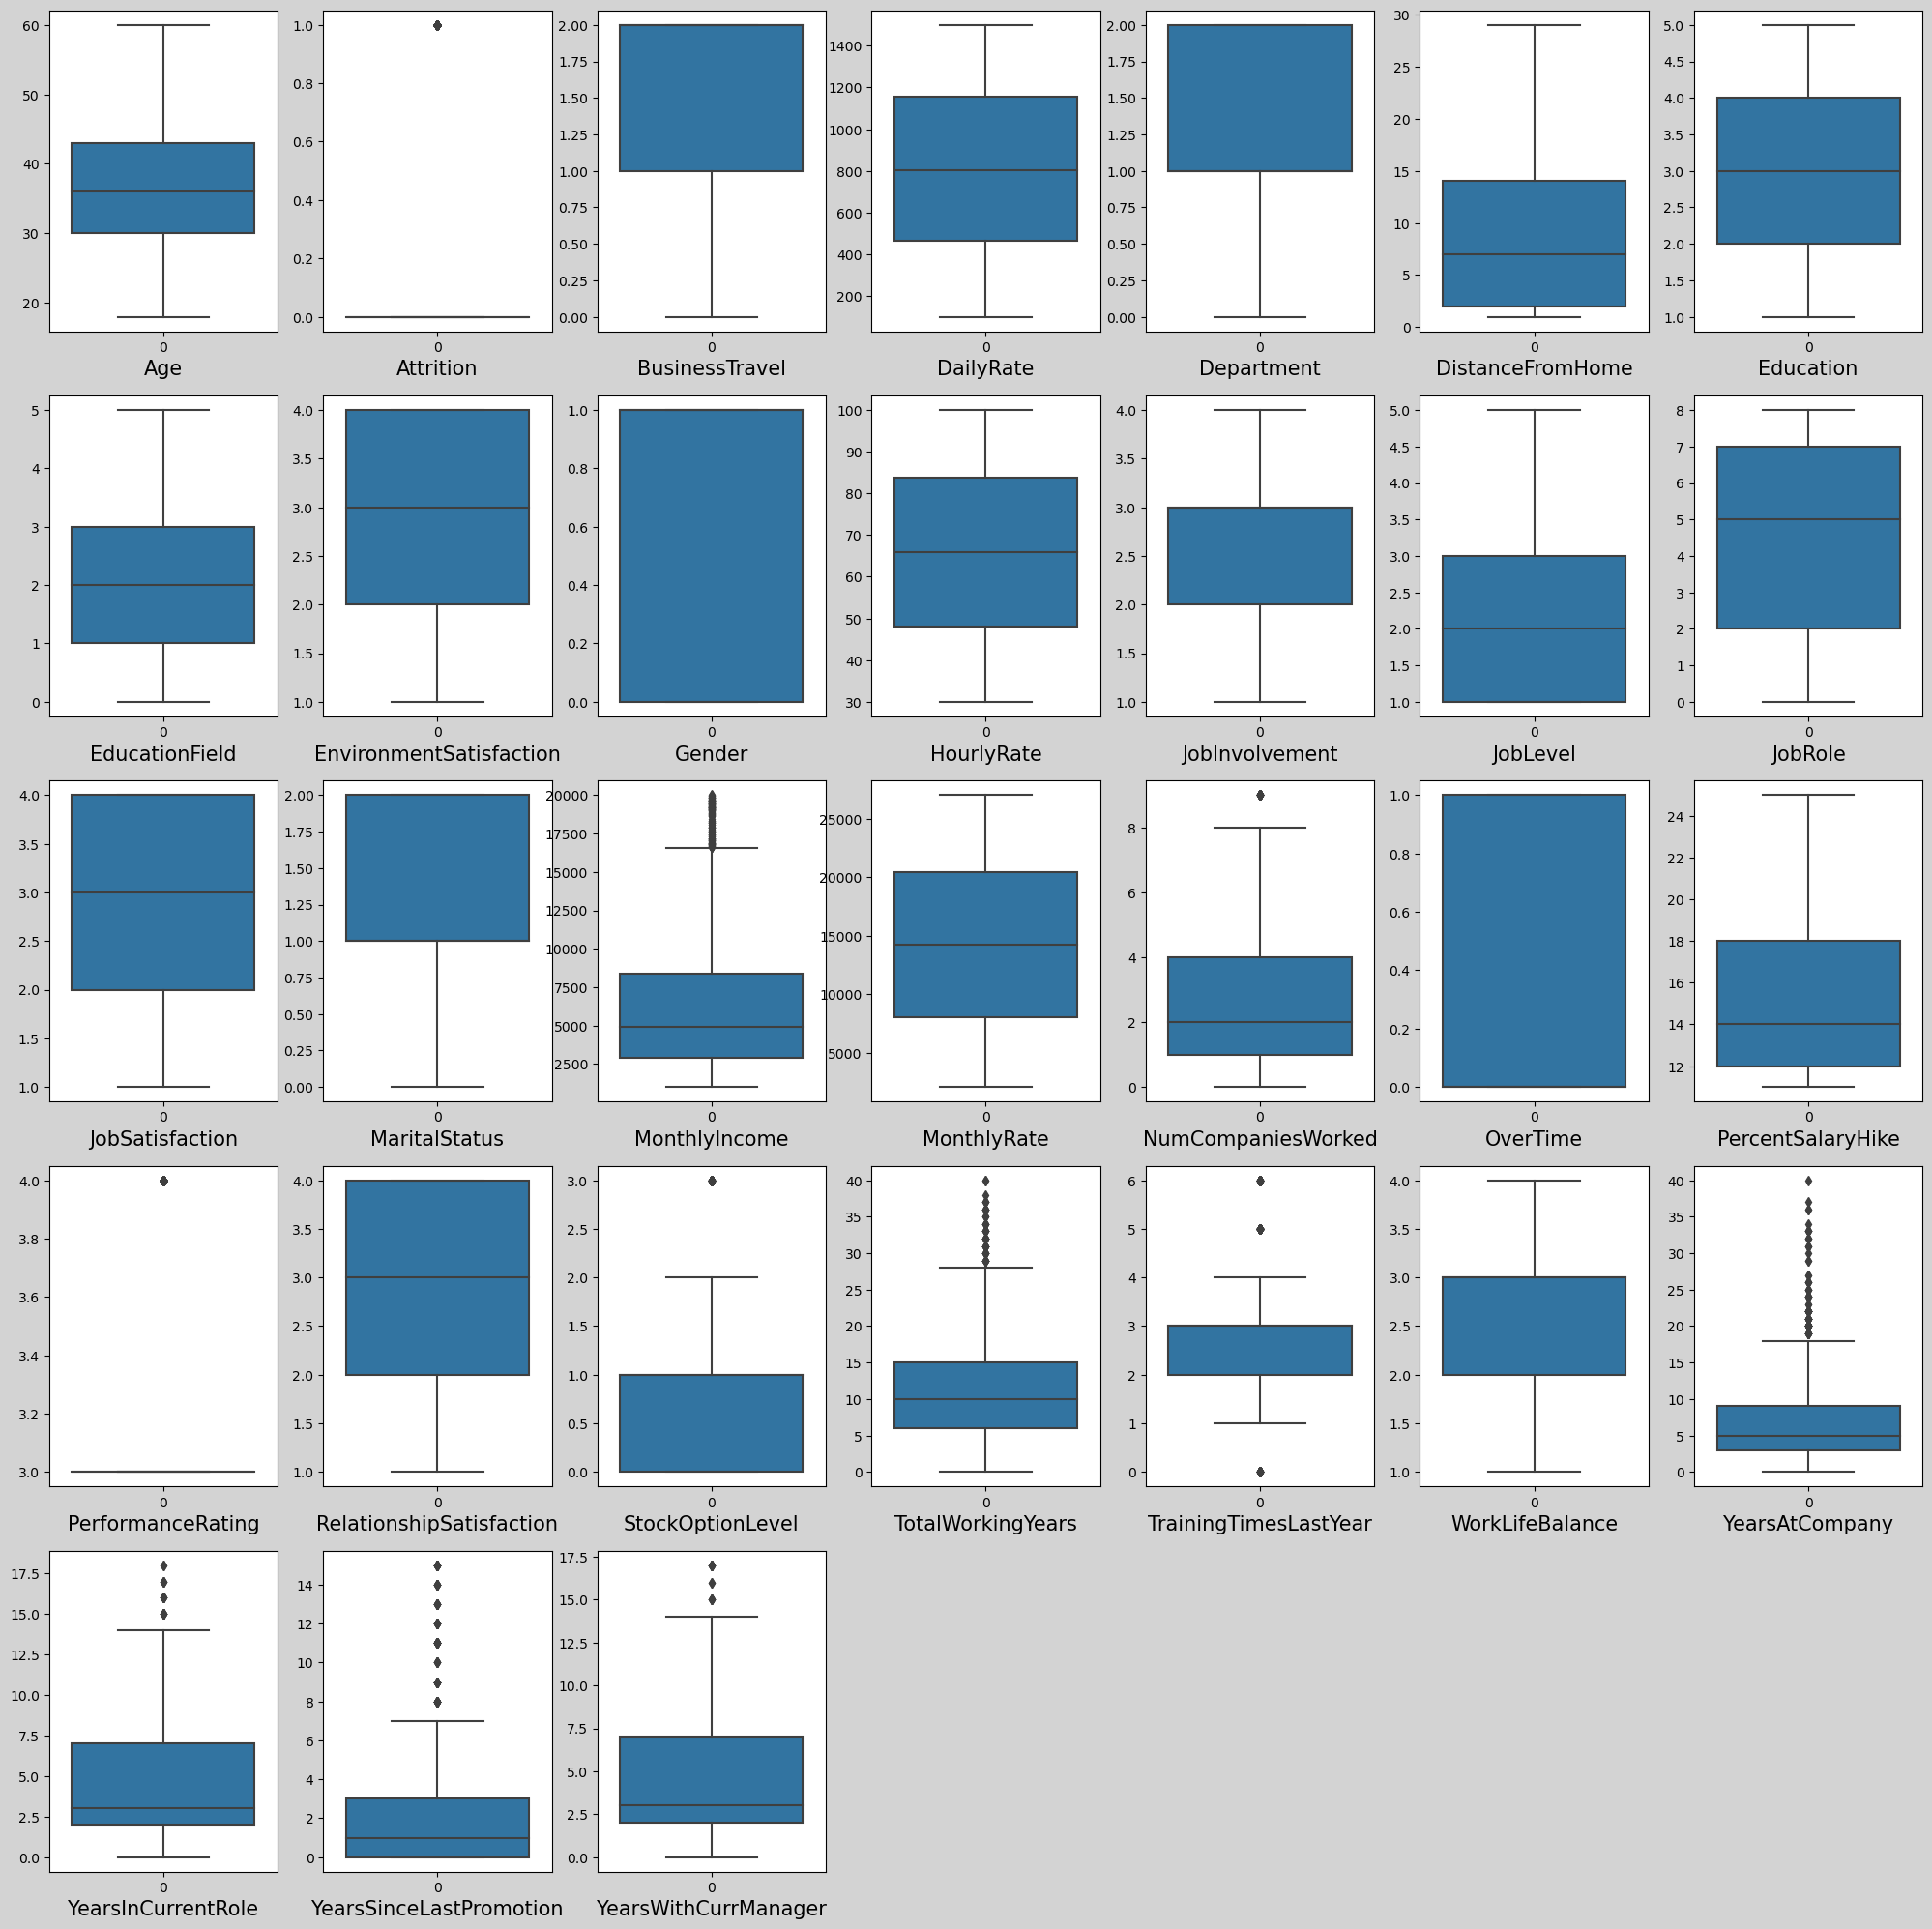

In [57]:
plt.figure(figsize=(25,25),facecolor='lightgrey')
p=1
for c in df:
    if p<=35:
        ax=plt.subplot(5,7,p)
        sns.boxplot(df[c])
        plt.xlabel(c,fontsize=15)
    p+=1

From above boxplots we can see that there are not much outliers present in the data

In [58]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df1=df[(z<3).all(axis=1)]

print ("Shape of the dataframe before removing outliers:",df.shape)
print ("Shape of the dataframe after removing outliers:",df1.shape)
print ("Data loss post outlier removal:",((df.shape[0]-df1.shape[0])/df.shape[0]*100),'%')

Shape of the dataframe before removing outliers: (1470, 31)
Shape of the dataframe after removing outliers: (1387, 31)
Data loss post outlier removal: 5.646258503401361 %


As the data loss is inside the acceptable range (10%), we will proceed with removing the outliers

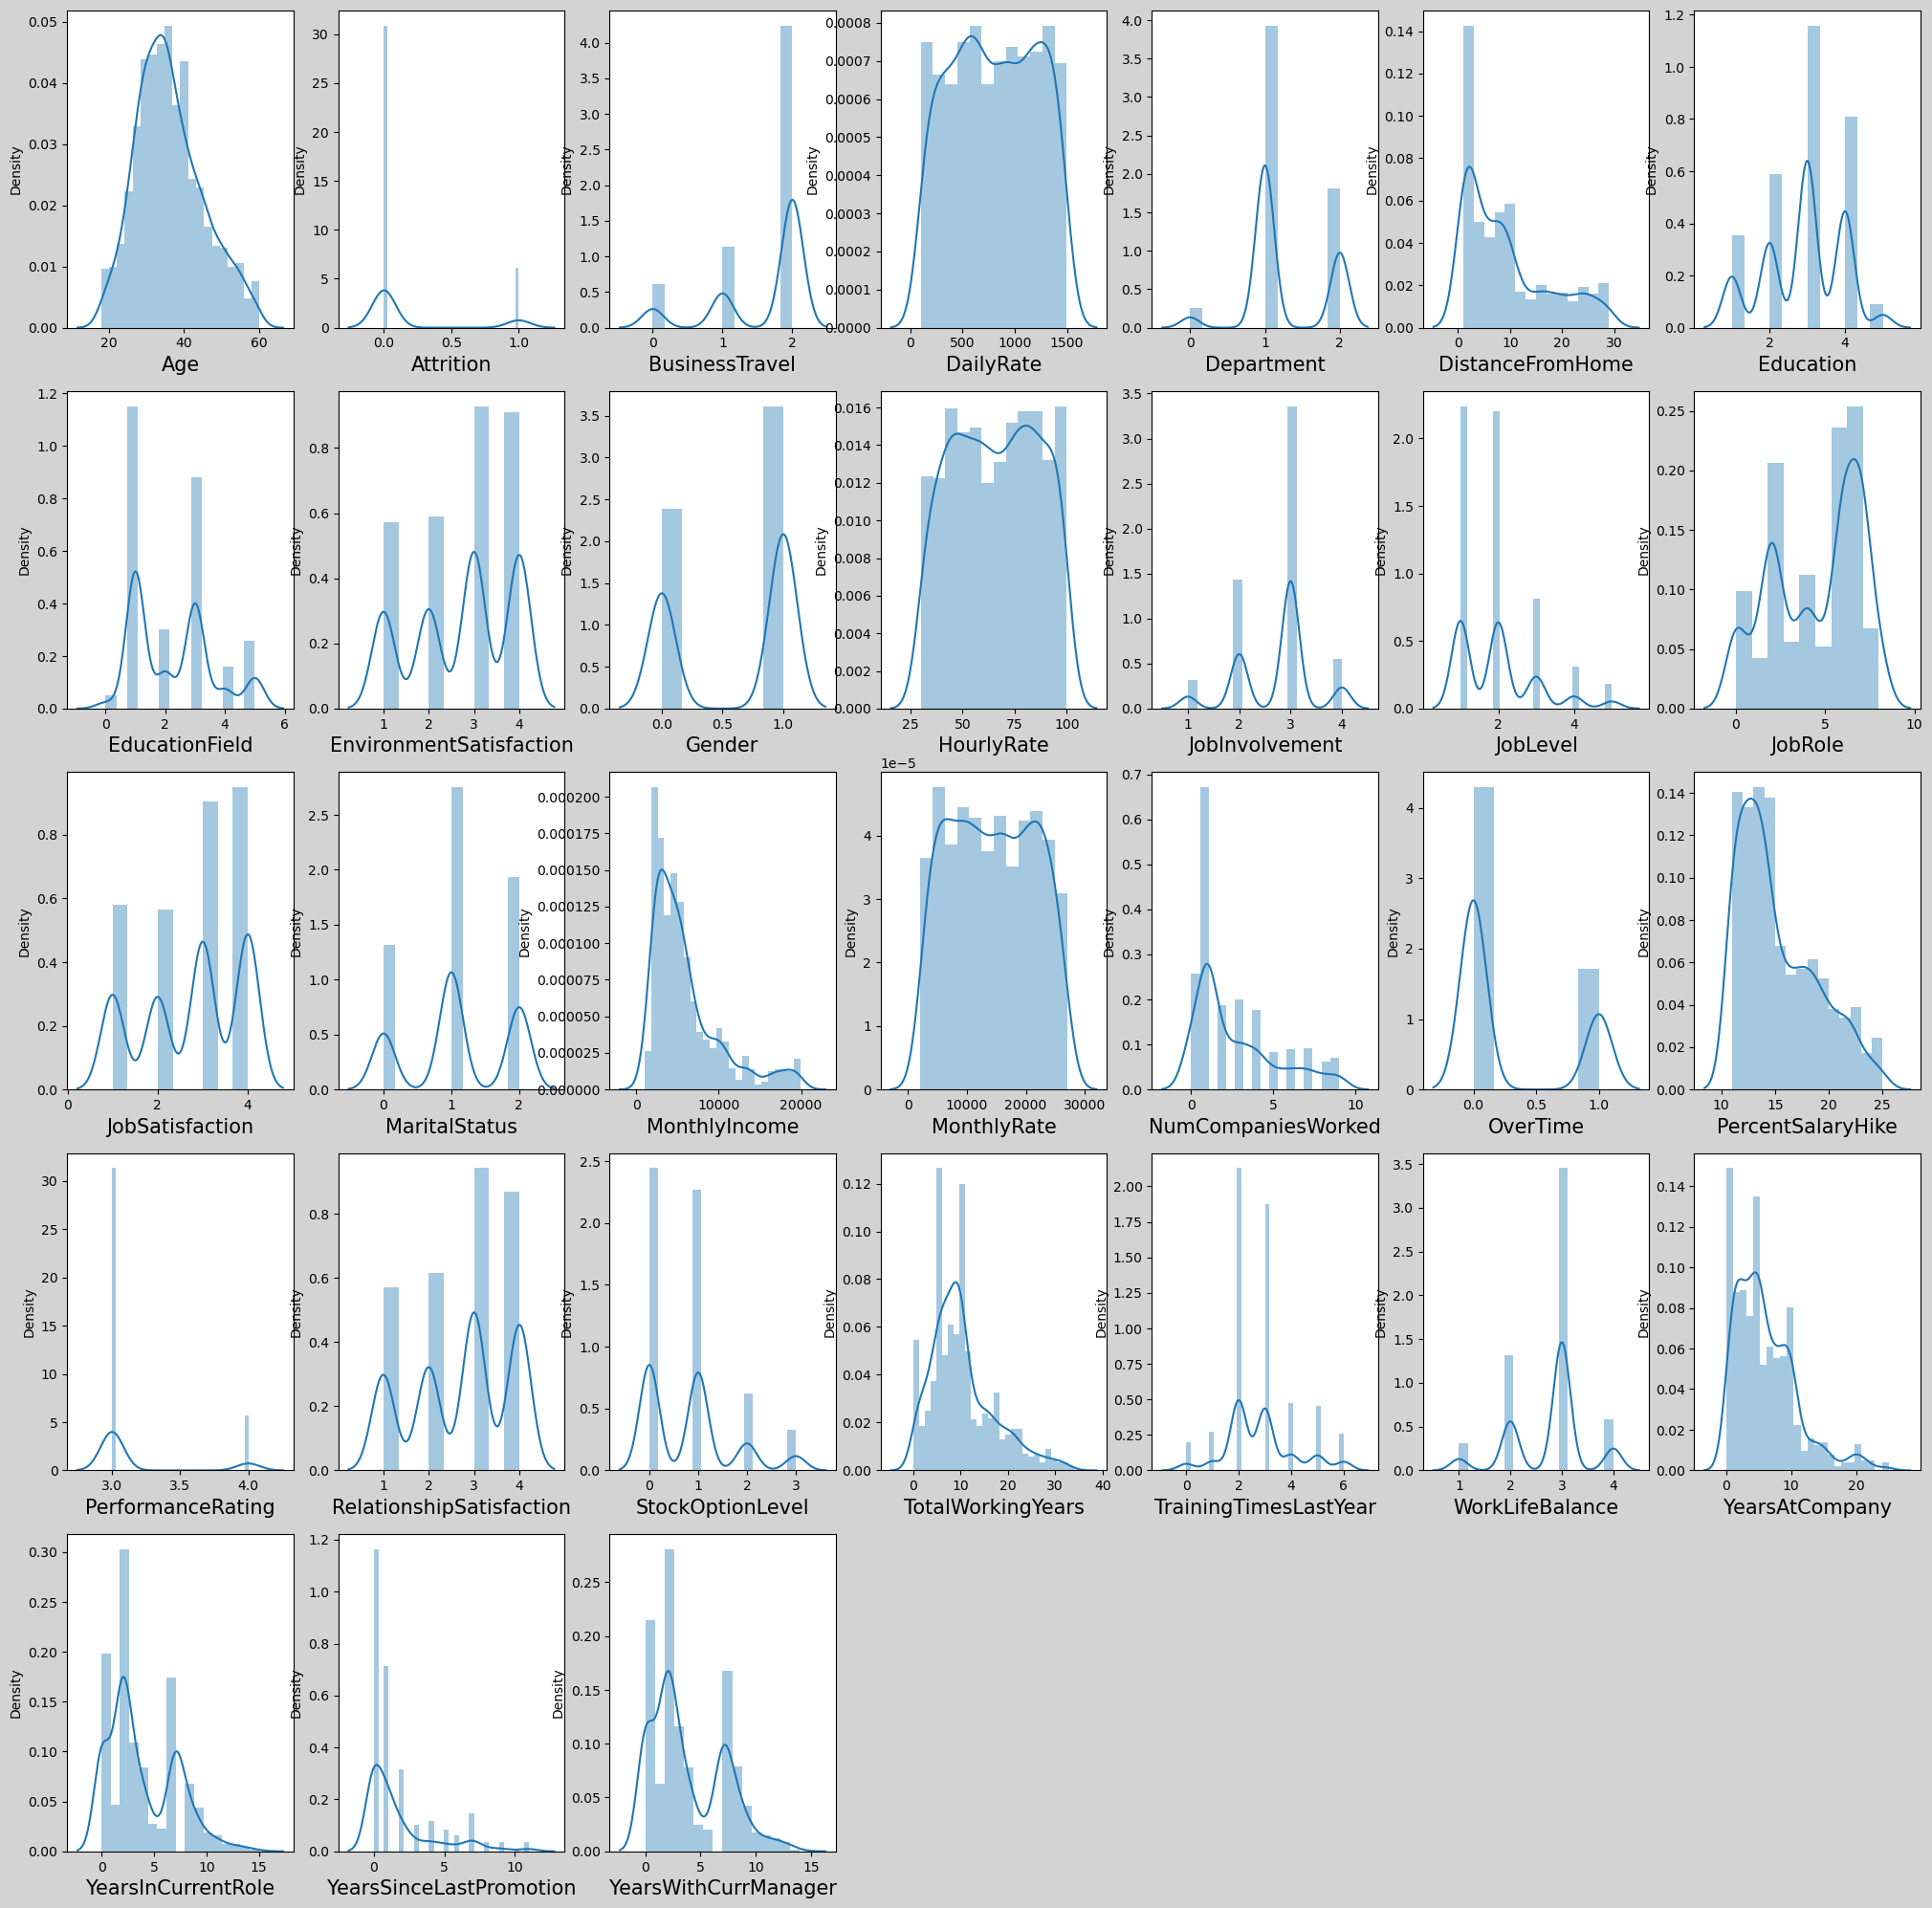

In [60]:
plt.figure(figsize=(25,25),facecolor='lightgrey')
ptno=1

for c in df1:
    if ptno<=31:
        ax=plt.subplot(5,7,ptno)
        sns.distplot(df1[c])
        plt.xlabel(c,fontsize=15)
        
    ptno+=1

In [61]:
df1.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [62]:
df1['MonthlyIncome']=np.cbrt(df1['MonthlyIncome'])
df1['TotalWorkingYears']=np.cbrt(df1['TotalWorkingYears'])
df1['YearsAtCompany']=np.cbrt(df1['YearsAtCompany'])
df1['YearsSinceLastPromotion']=np.cbrt(df1['YearsSinceLastPromotion'])
df1['DistanceFromHome']=np.cbrt(df1['DistanceFromHome'])

In [63]:
df1.skew()


Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.183373
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               0.742985
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears          -0.563399
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [80]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=df1.drop(['Attrition'],axis=1)
X=df1.drop(['Attrition'],axis=1)

In [92]:
X=sc.fit_transform(X)
x=pd.DataFrame(X,columns=x.columns)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.536681,0.593126,0.734325,1.405373,-1.410317,-0.876177,-0.940815,-0.665328,-1.229911,1.388670,...,-0.424765,-1.575817,-0.929427,-0.114048,-2.171420,-2.501172,0.252482,0.040903,-1.092503,0.368270
1,1.442111,-0.905354,-1.307769,-0.496337,0.161865,-1.853858,-0.940815,0.251978,0.813067,-0.239091,...,2.354241,1.199034,0.238250,0.184647,0.151871,0.336558,0.878987,0.965895,0.294582,0.982200
2,0.083966,0.593126,1.406752,-0.496337,-1.001674,-0.876177,1.305159,1.169285,0.813067,1.290017,...,-0.424765,-0.650866,-0.929427,-0.282450,0.151871,0.336558,-3.122519,-1.192419,-1.092503,-1.166556
3,-0.368749,-0.905354,1.453896,-0.496337,-0.715020,1.079185,-0.940815,1.169285,-1.229911,-0.485721,...,-0.424765,0.274084,-0.929427,-0.114048,0.151871,0.336558,0.592150,0.965895,0.908019,-1.166556
4,-1.047821,0.593126,-0.533609,-0.496337,-1.001674,-1.853858,0.556501,-1.582635,0.813067,-1.274939,...,-0.424765,1.199034,0.238250,-0.467759,0.151871,0.336558,-0.782424,-0.575758,0.655114,-0.552626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,-0.029213,-0.905354,0.193406,-0.496337,1.488578,-0.876177,0.556501,0.251978,0.813067,-1.225613,...,-0.424765,0.274084,0.238250,0.990880,0.151871,0.336558,0.053478,-0.575758,-1.092503,-0.245661
1383,0.310324,0.593126,-0.479021,-0.496337,-0.125655,-1.853858,0.556501,1.169285,0.813067,-1.176286,...,-0.424765,-1.575817,0.238250,0.040844,1.700732,0.336558,0.430434,0.965895,0.294582,0.982200
1384,-1.047821,0.593126,-1.615447,-0.496337,-0.486815,0.101504,-0.940815,-0.665328,0.813067,1.043387,...,2.354241,-0.650866,0.238250,-0.467759,-2.171420,0.336558,0.252482,-0.575758,-1.092503,-0.245661
1385,1.442111,-0.905354,0.538304,1.405373,-1.001674,0.101504,0.556501,1.169285,0.813067,-0.140439,...,-0.424765,1.199034,-0.929427,0.990880,0.151871,-1.082307,0.740892,0.657565,-1.092503,1.289165


In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif

,VIF,Features
0,1.852569,Age
1,1.016883,BusinessTravel
2,1.027393,DailyRate
3,2.011427,Department
4,1.015750,DistanceFromHome
5,1.063180,Education
6,1.019738,EducationField
7,1.026777,EnvironmentSatisfaction
8,1.025049,Gender
9,1.022338,HourlyRate


0    1158
1     229
Name: Attrition, dtype: int64

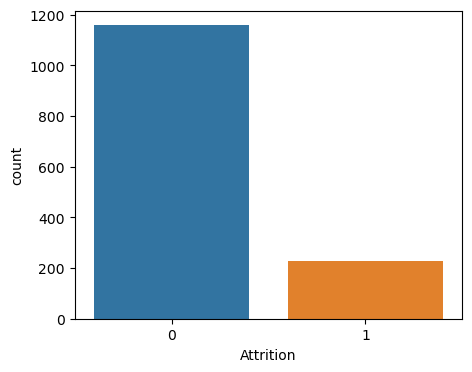

In [94]:
plt.figure(figsize=(5,4))
sns.countplot(x=df1['Attrition'])
df1['Attrition'].value_counts()

We can see that the data is imbalanced as values for 0 (no) is way more than 1 (yes). So we will use SMOTE to balance this.

In [95]:
from imblearn.over_sampling import SMOTE
f=df1.drop(['Attrition'],axis=1)
t=df1['Attrition']
smt=SMOTE(random_state=0,k_neighbors=1)
train_x,train_y=smt.fit_resample(f,t)
train_y.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

In [102]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [97]:
models=[GaussianNB(),LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),DecisionTreeClassifier(), SVC(),GradientBoostingClassifier()]

In [100]:
maxAcc = 0
maxRS = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(train_x,train_y,test_size = .25, random_state=i)
    for m in models:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        pred = m.predict(x_test)
        acc = accuracy_score(y_test,pred)
        if acc>maxAcc:
            maxAcc = acc
            maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.9550949913644214 on Random State: 54


In [105]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('For' ,m,'Accuracy score is: ',accuracy_score(y_test,predm))
    print ('\n','Confusion matrix:','\n',confusion_matrix(y_test,predm))
    print ('\n','Classification Report:','\n',classification_report(y_test,predm))
    cvs=cross_val_score(m,train_x,train_y)
    print('Cross Validation Score=',cvs.mean(),'\n')


For GaussianNB() Accuracy score is:  0.7927461139896373

 Confusion matrix: 
 [[217  86]
 [ 34 242]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.72      0.78       303
           1       0.74      0.88      0.80       276

    accuracy                           0.79       579
   macro avg       0.80      0.80      0.79       579
weighted avg       0.80      0.79      0.79       579

Cross Validation Score= 0.7755297162433902 

For LogisticRegression() Accuracy score is:  0.7340241796200345

 Confusion matrix: 
 [[214  89]
 [ 65 211]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.71      0.74       303
           1       0.70      0.76      0.73       276

    accuracy                           0.73       579
   macro avg       0.74      0.74      0.73       579
weighted avg       0.74      0.73      0.73       579

Cross Validation Score= 0.74053958441

In [106]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
param={'max_features':['auto','sqrt','log2'],
      'max_depth':[int(x) for x in np.linspace(10, 110, num = 11)],
      'criterion':['gini','entropy'],}

In [124]:
gs=GridSearchCV(rfc,param,cv=5,scoring='accuracy')
gs.fit(train_x,train_y)
gs.best_params_

{'criterion': 'entropy', 'max_depth': 70, 'max_features': 'auto'}

In [125]:
final_model=RandomForestClassifier(max_features='auto',criterion='entropy',max_depth=70)
final_model.fit(x_train, y_train)
fmod_pred = final_model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 94.99136442141624


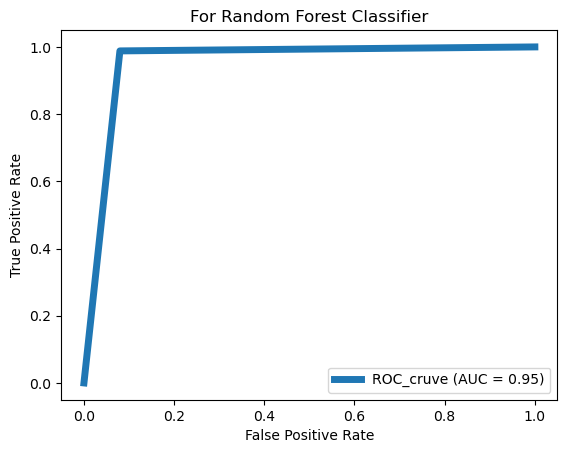

In [126]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(fmod_pred, y_test)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='ROC_cruve')
display.plot(lw=5)
plt.title('For Random Forest Classifier')
plt.show()

In [127]:
import joblib
joblib.dump(final_model,'HR_analytics')

['HR_analytics']